In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Green AI/ec_data.csv")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [7]:
X = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y = data[['energy_consumption']].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(128, activation='relu'),  # Hidden layer with 32 neurons
    Dense(64, activation='relu'),  # Hidden layer with 16 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

In [64]:
model.compile(optimizer='adam' , loss='mse' , metrics=['mae'])

In [65]:
history = model.fit(X_train,y_train, epochs =200, batch_size=32,validation_split=0.2, verbose=1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 90791.1328 - mae: 272.1381 - val_loss: 81047.7812 - val_mae: 253.8295
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84549.0547 - mae: 261.4818 - val_loss: 67108.5156 - val_mae: 224.4567
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67008.3516 - mae: 223.3490 - val_loss: 32801.9844 - val_mae: 145.5995
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28636.4180 - mae: 137.4088 - val_loss: 20657.0195 - val_mae: 121.3250
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20902.5156 - mae: 125.3124 - val_loss: 19093.6289 - val_mae: 117.7837
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17869.2051 - mae: 114.9818 - val_loss: 18983.1934 - val_mae: 117.2576
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18338.5098 - mae: 117.3687 - val_loss: 19091.0293 - val_mae: 117.9179
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17644.5684 - mae: 113.6292 - val_loss

In [66]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17524.9160 - mae: 113.3144  
Test Mean Absolute Error: 111.91


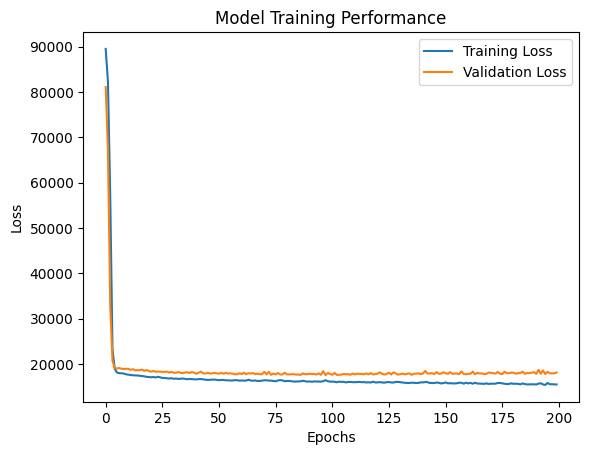

In [67]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [68]:
predictions = model.predict(X_test)
predictions



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[287.93344],
       [294.792  ],
       [268.87552],
       [275.37424],
       [352.18155],
       [291.85678],
       [305.30325],
       [336.64716],
       [299.28543],
       [277.14514],
       [227.62486],
       [278.23108],
       [324.08572],
       [255.20496],
       [281.4205 ],
       [309.80264],
       [275.02908],
       [337.93054],
       [285.18942],
       [246.31482],
       [274.62378],
       [295.6925 ],
       [246.31758],
       [293.1861 ],
       [289.7768 ],
       [282.4576 ],
       [292.84012],
       [292.37088],
       [293.50787],
       [300.36566],
       [279.93408],
       [235.38493],
       [281.01108],
       [229.9477 ],
       [281.60672],
       [312.93423],
       [272.4418 ],
       [283.7785 ],
       [240.45103],
       [264.80057],
       [262.0518 ],
       [290.25125],
       [267.73376],
       [259.76535],
       [288.07654],
       [287.64825],
       [267.9836 ],
       [250.15932],
       [289.78265],
       [279.7018 ],


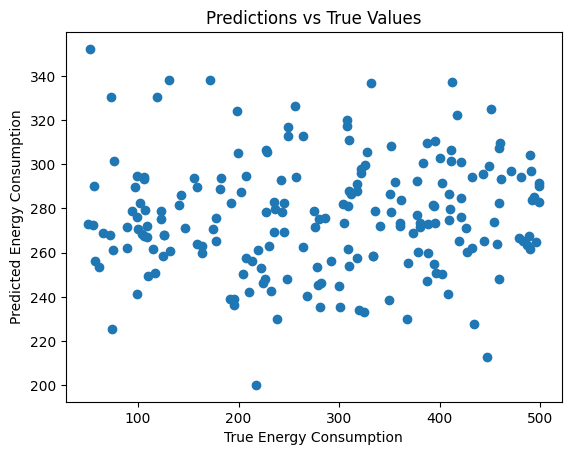

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()